In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from scipy import stats
from scipy.stats import norm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
from scipy import integrate
from scipy.integrate import quad
import pylab



In [205]:
data=pd.read_csv('delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [206]:
# EDA & DATA VISUALISATION

In [207]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [208]:
data.shape

(21, 2)

In [209]:
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [210]:
data.info

<bound method DataFrame.info of     Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5>

In [211]:
data1=data.iloc[:,1:]

In [212]:
data1

,Sorting Time
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [213]:
data['Sorting Time']=pd.to_numeric(data['Sorting Time'])

In [214]:
data['Sorting Time'].values

array([10,  4,  6,  9, 10,  6,  7,  3, 10,  9,  8,  4,  7,  3,  3,  4,  6,
        7,  2,  7,  5], dtype=int64)

In [215]:
data['Delivery Time']=pd.to_numeric(data['Delivery Time'])
data['Delivery Time']

0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: Delivery Time, dtype: float64

In [216]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [217]:
data[data.duplicated()]

,Delivery Time,Sorting Time


In [218]:
data_cleaned=data.drop_duplicates()

In [219]:
data_cleaned

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [220]:
data.head()


,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


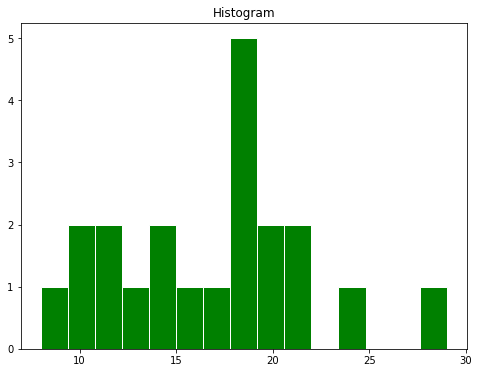

In [221]:
fig, ax=plt.subplots(figsize=(8,6))
ax=plt.hist(data['Delivery Time'],bins=15,color='g',edgecolor='w')
plt.title('Histogram')
plt.show()

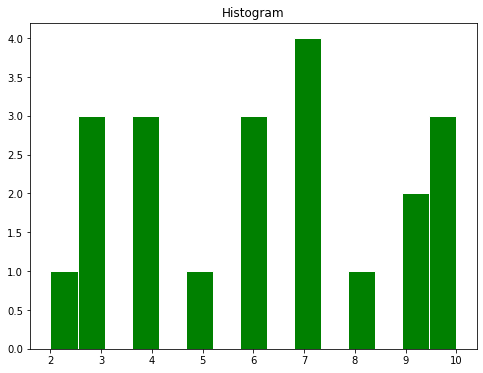

In [222]:
fig, ax=plt.subplots(figsize=(8,6))
ax=plt.hist(data['Sorting Time'],bins=15,color='g',edgecolor='w')
plt.title('Histogram')
plt.show()

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

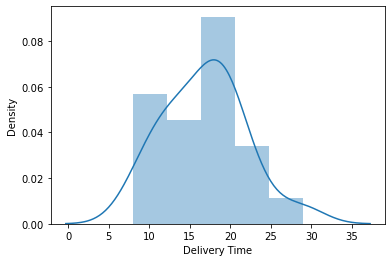

In [223]:
sns.distplot(data['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

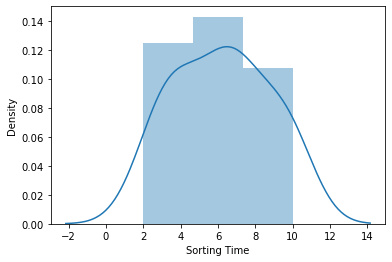

In [224]:
sns.distplot(data['Sorting Time'])

In [225]:
data1=pd.get_dummies(data,columns=['Delivery Time'])

In [226]:
data1

,Sorting Time,Delivery Time_8.0,Delivery Time_9.5,Delivery Time_10.75,Delivery Time_11.5,Delivery Time_12.03,Delivery Time_13.5,Delivery Time_13.75,Delivery Time_14.88,Delivery Time_15.35,...,Delivery Time_17.9,Delivery Time_18.11,Delivery Time_18.75,Delivery Time_19.0,Delivery Time_19.75,Delivery Time_19.83,Delivery Time_21.0,Delivery Time_21.5,Delivery Time_24.0,Delivery Time_29.0
0,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,4,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,6,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,10,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [227]:
data1=data1.dropna()

In [228]:
data1

,Sorting Time,Delivery Time_8.0,Delivery Time_9.5,Delivery Time_10.75,Delivery Time_11.5,Delivery Time_12.03,Delivery Time_13.5,Delivery Time_13.75,Delivery Time_14.88,Delivery Time_15.35,...,Delivery Time_17.9,Delivery Time_18.11,Delivery Time_18.75,Delivery Time_19.0,Delivery Time_19.75,Delivery Time_19.83,Delivery Time_21.0,Delivery Time_21.5,Delivery Time_24.0,Delivery Time_29.0
0,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,4,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,6,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,10,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [229]:
from numpy import set_printoptions

In [230]:
from sklearn.preprocessing import MinMaxScaler

In [231]:
array=data1.values
array

array([[10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  0,  0,  0,  0,  0],
       [ 9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0],
       [10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         0,  0,  0,  0,  0,  0],
       [ 3,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,

In [232]:
scaler=MinMaxScaler(feature_range=(0,1))
rescaledX=scaler.fit_transform(array[:,0:5])

In [233]:
set_printoptions(precision=1)
print(rescaledX [0:5,:])

[[1.  0.  0.  0.  0. ]
 [0.2 0.  0.  0.  0. ]
 [0.5 0.  0.  0.  0. ]
 [0.9 0.  0.  0.  0. ]
 [1.  0.  0.  0.  0. ]]


In [234]:
from sklearn.preprocessing import StandardScaler

In [235]:
array=data1.values
scaler=StandardScaler().fit(array)
rescaledX =scaler.transform(array)

In [236]:
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[ 1.54 -0.22 -0.22 -0.22 -0.22 -0.22 -0.22 -0.22 -0.22 -0.22 -0.22 -0.22
  -0.22 -0.22 -0.22 -0.22 -0.22 -0.22  4.47 -0.22 -0.22 -0.22]
 [-0.88 -0.22 -0.22 -0.22 -0.22 -0.22  4.47 -0.22 -0.22 -0.22 -0.22 -0.22
  -0.22 -0.22 -0.22 -0.22 -0.22 -0.22 -0.22 -0.22 -0.22 -0.22]
 [-0.08 -0.22 -0.22 -0.22 -0.22 -0.22 -0.22 -0.22 -0.22 -0.22 -0.22 -0.22
  -0.22 -0.22 -0.22 -0.22  4.47 -0.22 -0.22 -0.22 -0.22 -0.22]
 [ 1.13 -0.22 -0.22 -0.22 -0.22 -0.22 -0.22 -0.22 -0.22 -0.22 -0.22 -0.22
  -0.22 -0.22 -0.22 -0.22 -0.22 -0.22 -0.22 -0.22  4.47 -0.22]
 [ 1.54 -0.22 -0.22 -0.22 -0.22 -0.22 -0.22 -0.22 -0.22 -0.22 -0.22 -0.22
  -0.22 -0.22 -0.22 -0.22 -0.22 -0.22 -0.22 -0.22 -0.22  4.47]]


In [237]:
cols=data.columns

In [238]:
cols

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [239]:
cols=data1.columns
colours=['#000099','#ffff00']
cols

Index(['Sorting Time', 'Delivery Time_8.0', 'Delivery Time_9.5',
       'Delivery Time_10.75', 'Delivery Time_11.5', 'Delivery Time_12.03',
       'Delivery Time_13.5', 'Delivery Time_13.75', 'Delivery Time_14.88',
       'Delivery Time_15.35', 'Delivery Time_16.68', 'Delivery Time_17.83',
       'Delivery Time_17.9', 'Delivery Time_18.11', 'Delivery Time_18.75',
       'Delivery Time_19.0', 'Delivery Time_19.75', 'Delivery Time_19.83',
       'Delivery Time_21.0', 'Delivery Time_21.5', 'Delivery Time_24.0',
       'Delivery Time_29.0'],
      dtype='object')

<AxesSubplot:>

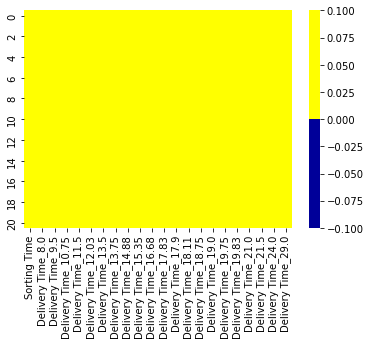

In [240]:
sns.heatmap(data1.isnull(),cmap=sns.color_palette(colours))

In [241]:
data1[data1.isnull().any(axis=1)]

,Sorting Time,Delivery Time_8.0,Delivery Time_9.5,Delivery Time_10.75,Delivery Time_11.5,Delivery Time_12.03,Delivery Time_13.5,Delivery Time_13.75,Delivery Time_14.88,Delivery Time_15.35,...,Delivery Time_17.9,Delivery Time_18.11,Delivery Time_18.75,Delivery Time_19.0,Delivery Time_19.75,Delivery Time_19.83,Delivery Time_21.0,Delivery Time_21.5,Delivery Time_24.0,Delivery Time_29.0


In [242]:
data1[data1.isnull().any(axis=1)].shape

(0, 22)

In [243]:
data1.isnull().sum()

Sorting Time           0
Delivery Time_8.0      0
Delivery Time_9.5      0
Delivery Time_10.75    0
Delivery Time_11.5     0
Delivery Time_12.03    0
Delivery Time_13.5     0
Delivery Time_13.75    0
Delivery Time_14.88    0
Delivery Time_15.35    0
Delivery Time_16.68    0
Delivery Time_17.83    0
Delivery Time_17.9     0
Delivery Time_18.11    0
Delivery Time_18.75    0
Delivery Time_19.0     0
Delivery Time_19.75    0
Delivery Time_19.83    0
Delivery Time_21.0     0
Delivery Time_21.5     0
Delivery Time_24.0     0
Delivery Time_29.0     0
dtype: int64

In [244]:
m1=data1['Sorting Time'].mean()
m1

6.190476190476191

In [245]:
data1['Sorting Time']=data1['Sorting Time'].fillna(m1)

In [246]:
data1['Sorting Time']

0     10
1      4
2      6
3      9
4     10
5      6
6      7
7      3
8     10
9      9
10     8
11     4
12     7
13     3
14     3
15     4
16     6
17     7
18     2
19     7
20     5
Name: Sorting Time, dtype: int64

In [247]:
data1['Sorting Time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21 entries, 0 to 20
Series name: Sorting Time
Non-Null Count  Dtype
--------------  -----
21 non-null     int64
dtypes: int64(1)
memory usage: 296.0 bytes


In [248]:
# FEATURE ENGINEERING

In [249]:
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [250]:
#CORRELATION

In [251]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


In [252]:
data.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

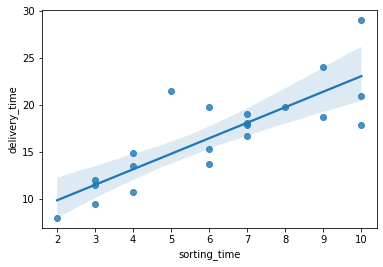

In [253]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])

In [254]:
# Transforming variables for accuracy

In [255]:
# MODEL BUILDING

In [256]:
import statsmodels.formula.api as smf
model=smf.ols("delivery_time~sorting_time",data=data).fit()
model

In [257]:
model.conf_int(0.05)

,0,1
Intercept,2.979134,10.186334
sorting_time,1.108673,2.189367


In [258]:
pred = model.predict(data.iloc[:,1])
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

Text(0, 0.5, 'delivery_time')

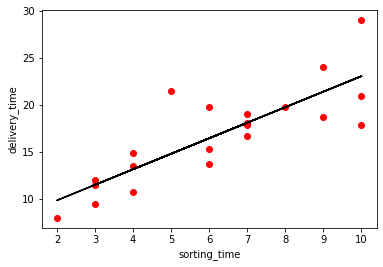

In [259]:
plt.scatter(x=data['sorting_time'],y=data['delivery_time'],color='red');plt.plot(data['sorting_time'],pred,color='black');plt.xlabel('sorting_time');plt.ylabel('delivery_time')

In [260]:
pred.corr(data.sorting_time) # 0.81

0.9999999999999997

In [261]:
model2 = smf.ols('sorting_time~np.log(delivery_time)',data=data).fit()
model2

In [262]:
model2.params

Intercept               -12.499233
np.log(delivery_time)     6.735548
dtype: float64

In [263]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sorting_time   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           1.59e-06
Time:                        09:32:09   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(delivery_time)     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [264]:
print(model2.conf_int(0.01))

                               0         1
Intercept             -20.369797 -4.628668
np.log(delivery_time)   3.916690  9.554407


In [265]:
pred2 = model2.predict(pd.DataFrame(data['delivery_time']))
pred2

0      8.007296
1      5.031310
2      7.593942
3      8.906703
4     10.181351
5      5.896328
6      7.333179
7      2.664452
8      6.931482
9      7.243965
10     7.621170
11     3.497060
12     6.456018
13     3.951314
14     4.254794
15     5.686869
16     5.154901
17     7.010043
18     1.506947
19     6.905090
20     8.165786
dtype: float64

In [266]:
pred2.corr(data.sorting_time)

0.8431772637224146

In [267]:
pred2 = model2.predict(data.iloc[:,0])
pred2

0      8.007296
1      5.031310
2      7.593942
3      8.906703
4     10.181351
5      5.896328
6      7.333179
7      2.664452
8      6.931482
9      7.243965
10     7.621170
11     3.497060
12     6.456018
13     3.951314
14     4.254794
15     5.686869
16     5.154901
17     7.010043
18     1.506947
19     6.905090
20     8.165786
dtype: float64

Text(0, 0.5, 'delivery_time')

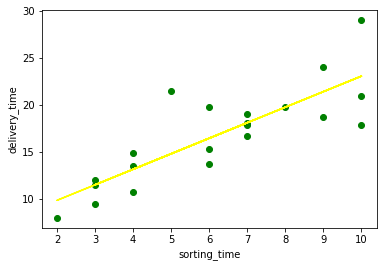

In [268]:
plt.scatter(x=data['sorting_time'],y=data['delivery_time'],color='green');plt.plot(data['sorting_time'],pred,color='yellow');plt.xlabel('sorting_time');plt.ylabel('delivery_time')


In [269]:
# Exponential transformation

In [270]:
model3 = smf.ols('np.log(sorting_time )~delivery_time',data=data).fit()
model3

In [271]:
model3.params

Intercept        0.437237
delivery_time    0.076901
dtype: float64

In [272]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(sorting_time)   R-squared:                       0.695
Model:                              OLS   Adj. R-squared:                  0.679
Method:                   Least Squares   F-statistic:                     43.39
Date:                  Sat, 01 Oct 2022   Prob (F-statistic):           2.64e-06
Time:                          09:32:14   Log-Likelihood:               -0.85600
No. Observations:                    21   AIC:                             5.712
Df Residuals:                        19   BIC:                             7.801
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4372      0.204      2.139      0.046       0.009       0.865
delivery_time     0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [273]:
print(model3.conf_int(0.01))

                      0         1
Intercept     -0.147491  1.021964
delivery_time  0.043499  0.110302


In [274]:
pred_log = model3.predict(pd.DataFrame(data['delivery_time']))
pred_log

0     2.052148
1     1.475394
2     1.956022
3     2.282850
4     2.667352
5     1.617660
6     1.898347
7     1.167792
8     1.813756
9     1.879122
10    1.962174
11    1.263917
12    1.719938
13    1.321593
14    1.362350
15    1.581517
16    1.494619
17    1.829905
18    1.052441
19    1.808373
20    2.090598
dtype: float64

In [275]:
pred3=np.exp(pred_log)
pred3

0      7.784605
1      4.372758
2      7.071145
3      9.804581
4     14.401789
5      5.041280
6      6.674852
7      3.214886
8      6.133444
9      6.547752
10     7.114781
11     3.539259
12     5.584181
13     3.749389
14     3.905361
15     4.862325
16     4.457638
17     6.233298
18     2.864635
19     6.100516
20     8.089754
dtype: float64

In [276]:
pred3.corr(data.sorting_time)

0.7472768828616799

Text(0, 0.5, 'delivery_time')

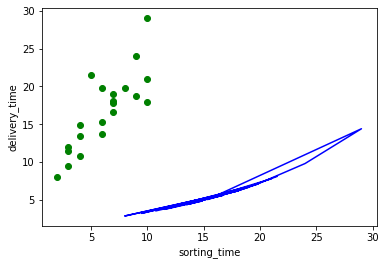

In [277]:
plt.scatter(x=data['sorting_time'],y=data['delivery_time'],color='green');plt.plot(data.delivery_time,np.exp(pred_log),color='blue');plt.xlabel('sorting_time');plt.ylabel('delivery_time')

In [278]:
resid_3 = pred3-data.sorting_time
resid_3

0    -2.215395
1     0.372758
2     1.071145
3     0.804581
4     4.401789
5    -0.958720
6    -0.325148
7     0.214886
8    -3.866556
9    -2.452248
10   -0.885219
11   -0.460741
12   -1.415819
13    0.749389
14    0.905361
15    0.862325
16   -1.542362
17   -0.766702
18    0.864635
19   -0.899484
20    3.089754
dtype: float64

In [279]:
# so we will consider the model having highest R-Squared value which is the log transformation - model3
# getting residuals of the entire data set

In [280]:
student_resid = model3.resid_pearson 
student_resid


array([ 0.95, -0.34, -0.62, -0.32, -1.38,  0.66,  0.18, -0.26,  1.84,
        1.2 ,  0.44,  0.46,  0.85, -0.84, -1.  , -0.74,  1.12,  0.44,
       -1.36,  0.52, -1.82])

Text(0, 0.5, 'Standardized Residual')

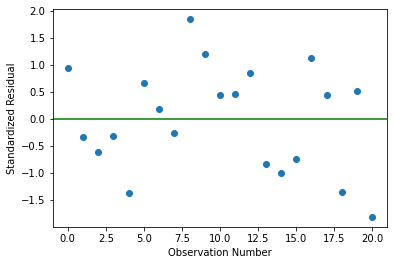

In [281]:
plt.plot(model3.resid_pearson,'o');plt.axhline(y=0,color='green');plt.xlabel("Observation Number");plt.ylabel("Standardized Residual")

In [282]:
# Predicted vs actual values

Text(0, 0.5, 'Actual')

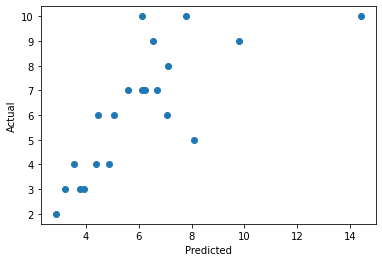

In [283]:
plt.scatter(x=pred3,y=data.sorting_time);plt.xlabel("Predicted");plt.ylabel("Actual")


Text(0, 0.5, 'Actual')

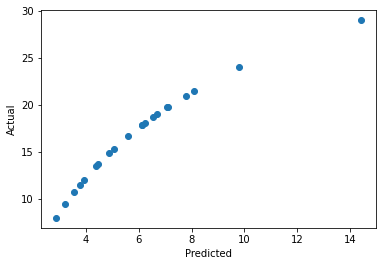

In [284]:
plt.scatter(x=pred3,y=data.delivery_time);plt.xlabel("Predicted");plt.ylabel("Actual")


In [285]:
# Quadratic model

In [286]:
data["delivery_time_Sq"] = data.delivery_time*data.delivery_time
data["delivery_time_Sq"]

0     441.0000
1     182.2500
2     390.0625
3     576.0000
4     841.0000
5     235.6225
6     361.0000
7      90.2500
8     320.4100
9     351.5625
10    393.2289
11    115.5625
12    278.2224
13    132.2500
14    144.7209
15    221.4144
16    189.0625
17    327.9721
18     64.0000
19    317.9089
20    462.2500
Name: delivery_time_Sq, dtype: float64

In [287]:
model_quad = smf.ols("sorting_time~delivery_time+delivery_time_Sq",data=data).fit()
model_quad 


In [288]:
model_quad.params

Intercept          -4.640096
delivery_time       0.894094
delivery_time_Sq   -0.013646
dtype: float64

In [289]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sorting_time   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     22.72
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           1.19e-05
Time:                        09:32:21   Log-Likelihood:                -35.650
No. Observations:                  21   AIC:                             77.30
Df Residuals:                      18   BIC:                             80.43
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -4.6401      2.864     -1.620      0.123     -10.657       1.377
delivery_time        0.8941      0.333      2.685      0.015       0.194       1.594
delivery_time_Sq    -0.0136      0.009     -1.469      0.159      -0.033       0.006
==============================================================================
Omnibus:                        1.829   Durbin-Watson:                   1.210
Prob(Omnibus):                  0.401   Jarque-Bera (JB):                0.513
Skew:                          -0.156   Prob(JB):                        0.774
Kurtosis:                       3.699   Cond. No.                     3.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [290]:
model_quad.conf_int(0.05)

,0,1
Intercept,-10.657470,1.377279
delivery_time,0.194383,1.593804
delivery_time_Sq,-0.033167,0.005874


NameError: name 'pre_quad' is not defined

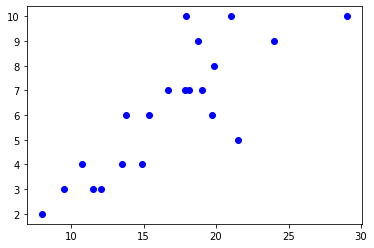

In [291]:
plt.scatter(data.delivery_time,data.sorting_time,c="b");plt.plot(data.delivery_time,pre_quad,"r")

(array([1., 0., 2., 3., 1., 8., 3., 1., 1., 1.]),
 array([-2.29, -1.85, -1.41, -0.97, -0.53, -0.09,  0.35,  0.79,  1.23,
         1.67,  2.11]),
 <BarContainer object of 10 artists>)

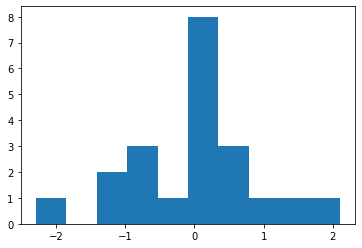

In [292]:
plt.hist(model_quad.resid_pearson) 

In [293]:
#### Implementing the Linear Regression model from sklearn library

In [294]:
from sklearn.linear_model import LinearRegression
import numpy as np

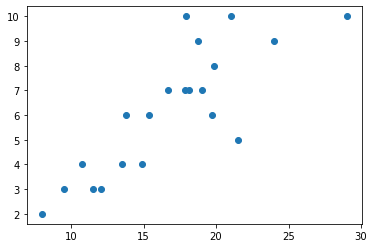

In [295]:
plt.scatter(data.delivery_time,data.sorting_time)

In [296]:
model1 = LinearRegression()

In [297]:
model1.fit(data.delivery_time.values.reshape(-1,1),data.sorting_time)


LinearRegression()

In [298]:
pred1 = model1.predict(data.delivery_time.values.reshape(-1,1))
pred1

array([ 7.93,  4.83,  7.41,  9.17, 11.24,  5.59,  7.1 ,  3.17,  6.65,
        7.  ,  7.45,  3.69,  6.14,  4.  ,  4.22,  5.4 ,  4.93,  6.74,
        2.55,  6.62,  8.14])

In [299]:
# Adjusted R-Squared value

In [300]:
model1.score(data.delivery_time.values.reshape(-1,1),data.sorting_time)# 0.6700

0.6822714748417231

In [301]:
rmse1 = np.sqrt(np.mean((pred1-data.sorting_time)**2)) # 32.760
rmse1

1.3983430567957227

In [302]:
model1.coef_

array([0.41])

In [303]:
model1.intercept_

-0.7566733660351259

In [304]:
#### Residuals Vs Fitted values

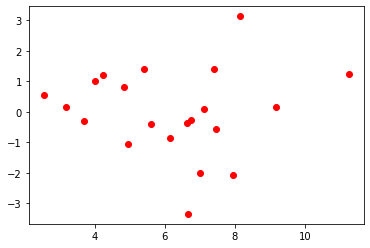

In [305]:
plt.scatter(pred1,(pred1-data.sorting_time),c="r")

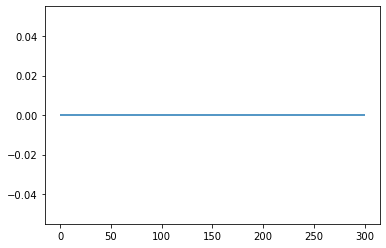

In [306]:
plt.hlines(y=0,xmin=0,xmax=300)

In [307]:
# checking normal distribution for residual

(array([1., 1., 1., 2., 5., 3., 3., 4., 0., 1.]),
 array([-3.35, -2.7 , -2.05, -1.4 , -0.75, -0.11,  0.54,  1.19,  1.84,
         2.49,  3.14]),
 <BarContainer object of 10 artists>)

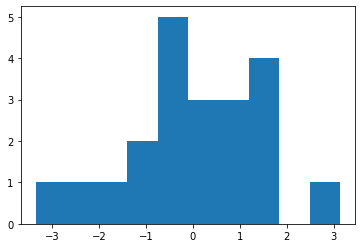

In [308]:
plt.hist(pred1-data.sorting_time)

In [309]:
### Fitting Quadratic Regression 

In [310]:
data["delivery_time_sqrd"] = data.delivery_time*data.delivery_time
data["delivery_time_sqrd"] 

0     441.0000
1     182.2500
2     390.0625
3     576.0000
4     841.0000
5     235.6225
6     361.0000
7      90.2500
8     320.4100
9     351.5625
10    393.2289
11    115.5625
12    278.2224
13    132.2500
14    144.7209
15    221.4144
16    189.0625
17    327.9721
18     64.0000
19    317.9089
20    462.2500
Name: delivery_time_sqrd, dtype: float64

In [311]:
model2 = LinearRegression()

In [312]:
model2.fit(X = data.iloc[:,[0,2]],y=data.sorting_time)

LinearRegression()

In [313]:
pred2 = model2.predict(data.iloc[:,[0,2]])
pred2

array([8.12, 4.94, 7.7 , 8.96, 9.81, 5.87, 7.42, 2.62, 6.99, 7.33, 7.72,
       3.39, 6.48, 3.84, 4.14, 5.64, 5.07, 7.08, 1.64, 6.96, 8.27])

In [314]:
# Adjusted R-Squared value

In [315]:
model2.score(data.iloc[:,[0,2]],data.sorting_time)# 0.67791

0.7162727530109554

In [316]:
rmse2 = np.sqrt(np.mean((pred2-data.sorting_time)**2)) # 32.366
rmse2

1.3214056182719238

In [317]:
model2.coef_

array([ 0.89, -0.01])

In [318]:
model2.intercept_

-4.6400955825789

In [319]:
#### Residuals Vs Fitted values

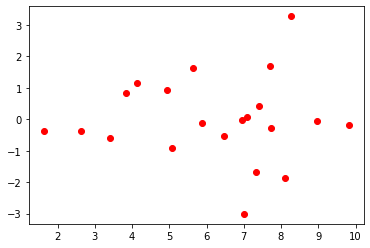

In [320]:
plt.scatter(pred2,(pred2-data.sorting_time),c="r")

In [321]:
# Checking normal distribution

(array([1., 1., 1., 3., 8., 1., 3., 2., 0., 1.]),
 array([-3.01, -2.38, -1.75, -1.12, -0.49,  0.13,  0.76,  1.39,  2.02,
         2.65,  3.27]),
 <BarContainer object of 10 artists>)

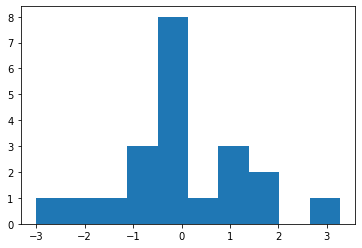

In [322]:
plt.hist(pred2-data.sorting_time)

In [323]:
import pylab
import scipy.stats as st

((array([-1.85, -1.41, -1.15, -0.94, -0.78, -0.63, -0.49, -0.36, -0.24,
         -0.12,  0.  ,  0.12,  0.24,  0.36,  0.49,  0.63,  0.78,  0.94,
          1.15,  1.41,  1.85]),
  array([-3.01, -1.88, -1.67, -0.93, -0.61, -0.52, -0.38, -0.36, -0.28,
         -0.19, -0.13, -0.04, -0.04,  0.08,  0.42,  0.84,  0.94,  1.14,
          1.64,  1.7 ,  3.27])),
 (1.3869056956098549, -5.661886069238746e-16, 0.9740418427229268))

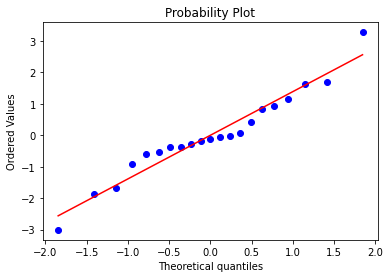

In [324]:
st.probplot(pred2-data.sorting_time,dist="norm",plot=pylab)

In [325]:
# Let us prepare a model by applying transformation on dependent variable

In [326]:
data["sorting_time_sqrt"] = np.sqrt(data.sorting_time)
data["sorting_time_sqrt"]


0     3.162278
1     2.000000
2     2.449490
3     3.000000
4     3.162278
5     2.449490
6     2.645751
7     1.732051
8     3.162278
9     3.000000
10    2.828427
11    2.000000
12    2.645751
13    1.732051
14    1.732051
15    2.000000
16    2.449490
17    2.645751
18    1.414214
19    2.645751
20    2.236068
Name: sorting_time_sqrt, dtype: float64

In [327]:
model3 = LinearRegression()

In [328]:
model3.fit(X= data.iloc[:,[0,1]],y=data.sorting_time_sqrt)

LinearRegression()

In [329]:
# Adjusted R-Squared value

In [330]:
model3.score(data.iloc[:,[0,2]],data.sorting_time_sqrt)# 0.74051


-18201.806114800103

In [331]:
rmse3 = np.sqrt(np.mean(((pred3)**2-data.sorting_time)**2)) # 32.0507
rmse3

55.198142379184844

In [332]:
model3.coef_

array([0. , 0.2])

In [333]:
model3.intercept_

1.1136915156738227

In [334]:
#### Residuals Vs Fitted values

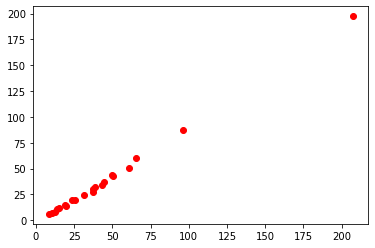

In [335]:
plt.scatter((pred3)**2,((pred3)**2-data.sorting_time),c="r")

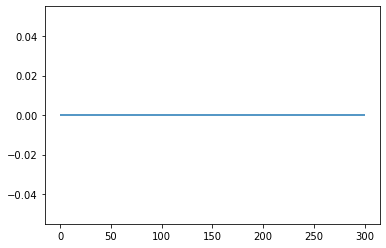

In [336]:
plt.hlines(y=0,xmin=0,xmax=300)  

In [337]:
# checking normal distribution for residuals 

(array([10.,  7.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([  6.21,  25.33,  44.45,  63.57,  82.69, 101.81, 120.93, 140.05,
        159.17, 178.29, 197.41]),
 <BarContainer object of 10 artists>)

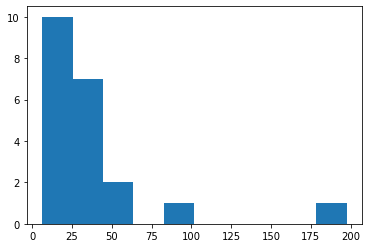

In [338]:
plt.hist((pred3)**2-data.sorting_time)

((array([-1.85, -1.41, -1.15, -0.94, -0.78, -0.63, -0.49, -0.36, -0.24,
         -0.12,  0.  ,  0.12,  0.24,  0.36,  0.49,  0.63,  0.78,  0.94,
          1.15,  1.41,  1.85]),
  array([  6.21,   7.34,   8.53,  11.06,  12.25,  13.87,  15.12,  19.41,
          19.64,  24.18,  27.62,  30.22,  31.85,  33.87,  37.55,  42.62,
          44.  ,  50.6 ,  60.44,  87.13, 197.41])),
 (34.5544975924375, 37.187235204908696, 0.7861438128965307))

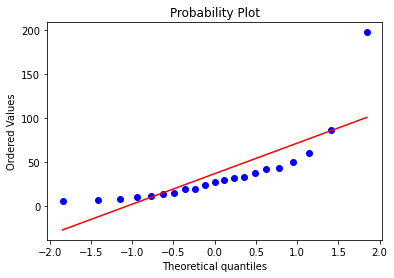

In [339]:
st.probplot((pred3)**2-data.sorting_time,dist="norm",plot=pylab)


In [340]:
# Let us prepare a model by applying transformation on dependent variable without transformation on input variables 

In [341]:
model4 = LinearRegression()

In [342]:
model4.fit(X = data.delivery_time.values.reshape(-1,1),y=data.sorting_time_sqrt)

LinearRegression()

In [343]:
pred4 = model4.predict( data.delivery_time.values.reshape(-1,1))
pred4

array([2.8 , 2.14, 2.69, 3.07, 3.5 , 2.31, 2.63, 1.79, 2.53, 2.6 , 2.7 ,
       1.9 , 2.42, 1.97, 2.02, 2.27, 2.17, 2.55, 1.66, 2.52, 2.85])

In [344]:
# Adjusted R-Squared value

In [345]:
model4.score(data.delivery_time.values.reshape(-1,1),data.sorting_time_sqrt)# 0.7096

0.695806227630867

In [346]:
rmse4 = np.sqrt(np.mean(((pred4)**2-data.sorting_time)**2)) # 34.165
rmse4

1.509951779607749

In [347]:
model4.coef_

array([0.09])

In [348]:
model4.intercept_

0.9609339829284425

In [349]:
#### Residuals Vs Fitted values

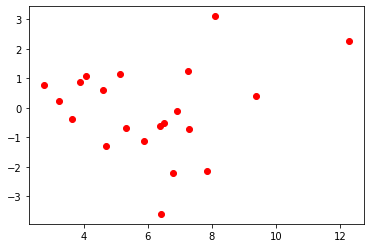

In [350]:
plt.scatter((pred4)**2,((pred4)**2-data.sorting_time),c="r")

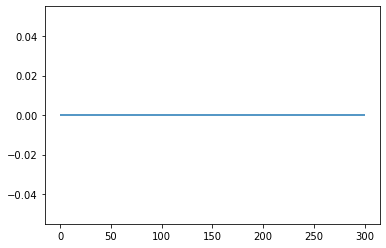

In [351]:
plt.hlines(y=0,xmin=0,xmax=300)

((array([-1.85, -1.41, -1.15, -0.94, -0.78, -0.63, -0.49, -0.36, -0.24,
         -0.12,  0.  ,  0.12,  0.24,  0.36,  0.49,  0.63,  0.78,  0.94,
          1.15,  1.41,  1.85]),
  array([-3.6 , -2.22, -2.15, -1.31, -1.13, -0.71, -0.68, -0.63, -0.5 ,
         -0.38, -0.1 ,  0.22,  0.39,  0.6 ,  0.76,  0.88,  1.06,  1.13,
          1.25,  2.27,  3.1 ])),
 (1.6050450963452165, -0.08242073596651411, 0.9879590704849802))

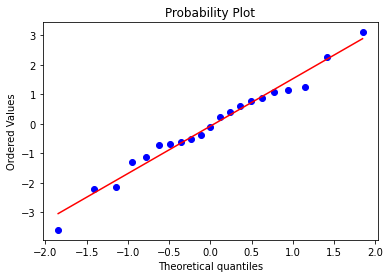

In [352]:
st.probplot((pred4)**2-data.sorting_time,dist="norm",plot=pylab)

In [353]:
# Checking normal distribution for residuals 

(array([1., 0., 2., 2., 5., 3., 4., 2., 1., 1.]),
 array([-3.6 , -2.93, -2.26, -1.59, -0.92, -0.25,  0.42,  1.09,  1.76,
         2.43,  3.1 ]),
 <BarContainer object of 10 artists>)

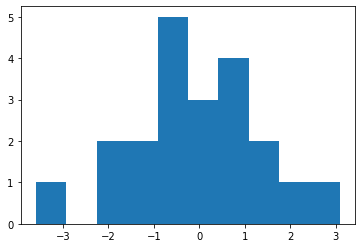

In [354]:
plt.hist((pred4)**2-data.sorting_time)

In [355]:
#MODEL TESTING

In [356]:
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [357]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           3.98e-06
Time:                        09:32:39   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [358]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [359]:
#MODEL PREDICTION

In [360]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [361]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [362]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [363]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

In [364]:
#SALARY_HIKE -> BUILD A PREDICTION MODEL FOR SALARY_HIKE

In [530]:
dataset=pd.read_csv('Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [531]:
# EDA & DATA VISUALISATION

In [532]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [533]:
dataset.shape

(30, 2)

In [534]:
dataset.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [511]:
dataset.info

<bound method DataFrame.info of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>

In [512]:
dataset=dataset.iloc[:,1:]
dataset

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


In [513]:
dataset['Salary']=pd.to_numeric(dataset['Salary'])
dataset['Salary']

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [514]:
dataset['Salary'].values

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [537]:
dataset['YearsExperience']=pd.to_numeric(dataset['YearsExperience'])
dataset['YearsExperience']

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64

In [538]:
dataset_cleaned=dataset.drop_duplicates()
dataset_cleaned

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [539]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


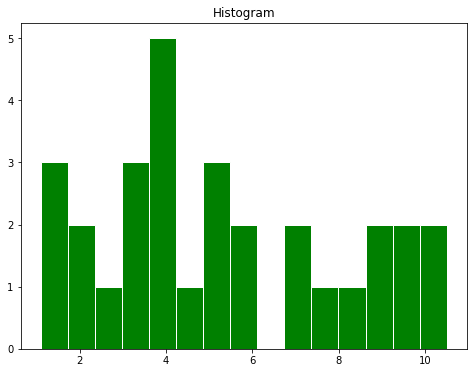

In [540]:
fig, ax=plt.subplots(figsize=(8,6))
ax=plt.hist(dataset['YearsExperience'],bins=15,color='g',edgecolor='w')
plt.title('Histogram')
plt.show()

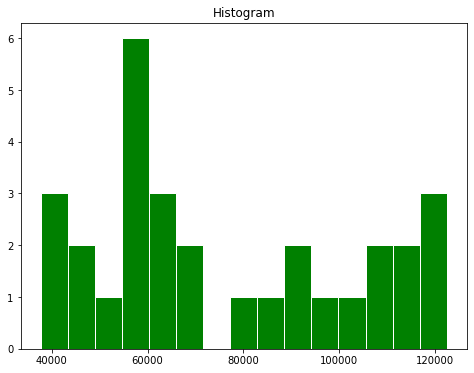

In [541]:
fig, ax=plt.subplots(figsize=(8,6))
ax=plt.hist(dataset['Salary'],bins=15,color='g',edgecolor='w')
plt.title('Histogram')
plt.show()

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

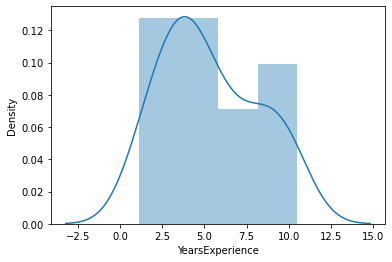

In [542]:
sns.distplot(dataset['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

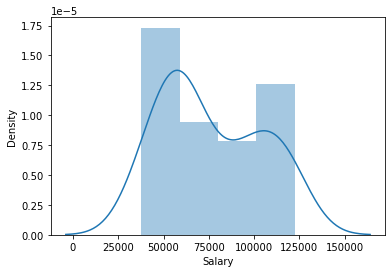

In [543]:
sns.distplot(dataset['Salary'])

In [544]:
dataset1=pd.get_dummies(dataset,columns=['YearsExperience'])
dataset1

,Salary,YearsExperience_1.1,YearsExperience_1.3,YearsExperience_1.5,YearsExperience_2.0,YearsExperience_2.2,YearsExperience_2.9,YearsExperience_3.0,YearsExperience_3.2,YearsExperience_3.7,...,YearsExperience_6.8,YearsExperience_7.1,YearsExperience_7.9,YearsExperience_8.2,YearsExperience_8.7,YearsExperience_9.0,YearsExperience_9.5,YearsExperience_9.6,YearsExperience_10.3,YearsExperience_10.5
0,39343.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,46205.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,37731.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,43525.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,39891.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,56642.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,60150.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,54445.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,64445.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,57189.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [545]:
dataset2=pd.get_dummies(dataset,columns=['Salary'])
dataset2

,YearsExperience,Salary_37731.0,Salary_39343.0,Salary_39891.0,Salary_43525.0,Salary_46205.0,Salary_54445.0,Salary_55794.0,Salary_56642.0,Salary_56957.0,...,Salary_93940.0,Salary_98273.0,Salary_101302.0,Salary_105582.0,Salary_109431.0,Salary_112635.0,Salary_113812.0,Salary_116969.0,Salary_121872.0,Salary_122391.0
0,1.1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.3,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.9,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,3.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3.2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,3.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3.7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [546]:
dataset1=dataset1.dropna()
dataset1

,Salary,YearsExperience_1.1,YearsExperience_1.3,YearsExperience_1.5,YearsExperience_2.0,YearsExperience_2.2,YearsExperience_2.9,YearsExperience_3.0,YearsExperience_3.2,YearsExperience_3.7,...,YearsExperience_6.8,YearsExperience_7.1,YearsExperience_7.9,YearsExperience_8.2,YearsExperience_8.7,YearsExperience_9.0,YearsExperience_9.5,YearsExperience_9.6,YearsExperience_10.3,YearsExperience_10.5
0,39343.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,46205.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,37731.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,43525.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,39891.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,56642.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,60150.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,54445.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,64445.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,57189.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [547]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [548]:
array=dataset1.values
array

array([[3.93e+04, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [4.62e+04, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [3.77e+04, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       

In [549]:
scaler=MinMaxScaler(feature_range=(0,1))
rescaledX=scaler.fit_transform(array[:,0:5])

In [550]:
set_printoptions(precision=1)
print(rescaledX [0:5,:])

[[0.  1.  0.  0.  0. ]
 [0.1 0.  1.  0.  0. ]
 [0.  0.  0.  1.  0. ]
 [0.1 0.  0.  0.  1. ]
 [0.  0.  0.  0.  0. ]]


In [551]:
from sklearn.preprocessing import StandardScaler

In [552]:
array=dataset.values
scaler=StandardScaler().fit(array)
rescaledX =scaler.transform(array)

In [553]:
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[-1.51 -1.36]
 [-1.44 -1.11]
 [-1.37 -1.42]
 [-1.19 -1.2 ]
 [-1.12 -1.34]]


In [554]:
cols=dataset.columns
cols

Index(['YearsExperience', 'Salary'], dtype='object')

In [555]:
cols=dataset.columns
colours=['#000099','#ffff00']
cols

Index(['YearsExperience', 'Salary'], dtype='object')

<AxesSubplot:>

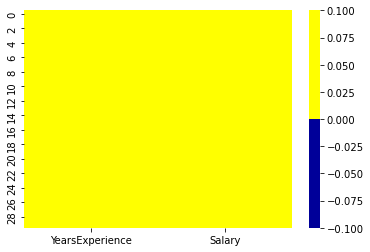

In [556]:
sns.heatmap(dataset.isnull(),cmap=sns.color_palette(colours))

In [557]:
dataset[dataset.isnull().any(axis=1)]

,YearsExperience,Salary


In [558]:
dataset[dataset.isnull().any(axis=1)].shape

(0, 2)

In [559]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [560]:
m1=dataset['YearsExperience'].mean()
m1

5.3133333333333335

In [561]:
dataset['YearsExperience']=dataset['YearsExperience'].fillna(m1)
dataset['YearsExperience']

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64

In [562]:
dataset['YearsExperience'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 30 entries, 0 to 29
Series name: YearsExperience
Non-Null Count  Dtype  
--------------  -----  
30 non-null     float64
dtypes: float64(1)
memory usage: 368.0 bytes


In [563]:
m1=dataset['Salary'].mean()
m1

76003.0

In [564]:
dataset['Salary']=dataset['Salary'].fillna(m1)
dataset['Salary']

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [565]:
dataset['Salary'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 30 entries, 0 to 29
Series name: Salary
Non-Null Count  Dtype  
--------------  -----  
30 non-null     float64
dtypes: float64(1)
memory usage: 368.0 bytes


In [566]:
# FEATURE ENGINEERING

In [567]:
#CORRELATION

In [568]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [569]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

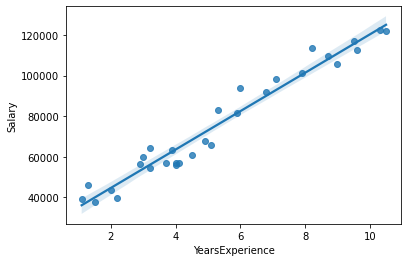

In [570]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])

In [571]:
# Transforming variables for accuracy

In [572]:
#MODEL BUILDING

In [573]:
import statsmodels.formula.api as smf
model=smf.ols("YearsExperience~Salary",data=dataset).fit()
model

In [574]:
model.conf_int(0.05)

,0,1
Intercept,-3.053603,-1.712718
Salary,0.000093,0.000110


In [575]:
pred = model.predict(dataset.iloc[:,1])
pred

0      1.600934
1      2.295819
2      1.437694
3      2.024427
4      1.656428
5      3.352729
6      3.707969
7      3.130248
8      4.142905
9      3.408121
10     4.018652
11     3.266856
12     3.384628
13     3.397185
14     3.805285
15     4.496626
16     4.303310
17     6.030801
18     5.856117
19     7.129735
20     6.906748
21     7.568520
22     7.875253
23     9.142087
24     8.698442
25     8.308670
26     9.461782
27     9.022897
28    10.010845
29     9.958288
dtype: float64

Text(0, 0.5, 'YearsExperience')

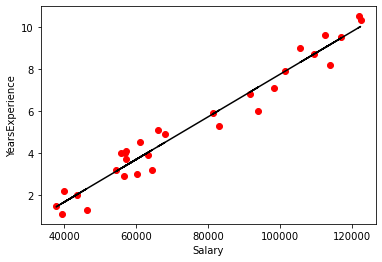

In [576]:
plt.scatter(x=dataset['Salary'],y=dataset['YearsExperience'],color='red');plt.plot(dataset['Salary'],pred,color='black');plt.xlabel('Salary');plt.ylabel('YearsExperience')

In [577]:
pred.corr(dataset.Salary) # 0.81

0.9999999999999999

In [578]:
model2 = smf.ols('Salary~np.log(YearsExperience)',data=dataset).fit()
model2

In [579]:
model2.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [580]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           3.25e-13
Time:                        09:51:52   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [581]:
print(model2.conf_int(0.01))

                                    0             1
Intercept                  679.965646  29175.977894
np.log(YearsExperience)  31815.666558  49348.309362


In [582]:
pred2 = model2.predict(pd.DataFrame(dataset['YearsExperience']))
pred2

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

In [583]:
pred2.corr(dataset.Salary)

0.9240610817882637

In [584]:
pred2 = model2.predict(dataset.iloc[:,0])
pred2

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

Text(0, 0.5, 'YearsExperience')

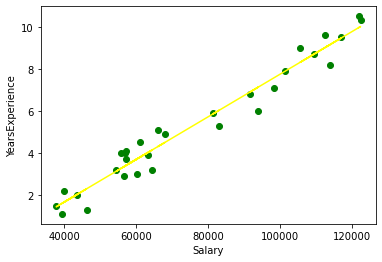

In [585]:
plt.scatter(x=dataset['Salary'],y=dataset['YearsExperience'],color='green');plt.plot(dataset['Salary'],pred,color='yellow');plt.xlabel('Salary');plt.ylabel('YearsExperience')

In [586]:
# Exponential transformation

In [587]:
model3 = smf.ols('np.log(Salary )~YearsExperience',data=dataset).fit()
model3

In [588]:
model3.params

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [589]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           7.03e-18
Time:                        09:52:13   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [590]:
print(model3.conf_int(0.01))

                         0          1
Intercept        10.401175  10.613629
YearsExperience   0.107752   0.143153


In [591]:
pred_log = model3.predict(pd.DataFrame(dataset['YearsExperience']))
pred_log

0     10.645400
1     10.670491
2     10.695581
3     10.758308
4     10.783398
5     10.871215
6     10.883761
7     10.908851
8     10.908851
9     10.971578
10    10.996668
11    11.009213
12    11.009213
13    11.021759
14    11.071940
15    11.122121
16    11.147212
17    11.172302
18    11.247574
19    11.260119
20    11.360482
21    11.398117
22    11.498480
23    11.536116
24    11.598842
25    11.636478
26    11.699204
27    11.711750
28    11.799567
29    11.824657
dtype: float64

In [592]:
pred3=np.exp(pred_log)
pred3

0      41998.957468
1      43066.066794
2      44160.289228
3      47019.029189
4      48213.688474
5      52639.142472
6      53303.675386
7      54658.014935
8      54658.014935
9      58196.330788
10     59674.982903
11     60428.338456
12     60428.338456
13     61191.204604
14     64340.199291
15     67651.246149
16     69370.128712
17     71132.684635
18     76693.630780
19     77661.835040
20     85860.704208
21     89153.725393
22     98565.809591
23    102346.110512
24    108971.540758
25    113150.933364
26    120475.819601
27    121996.743836
28    133194.621344
29    136578.829694
dtype: float64

In [593]:
pred3.corr(dataset.YearsExperience)

0.9881994372988415

Text(0, 0.5, 'Salary')

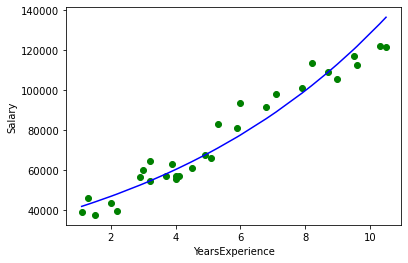

In [594]:
plt.scatter(x=dataset['YearsExperience'],y=dataset['Salary'],color='green');plt.plot(dataset.YearsExperience,np.exp(pred_log),color='blue');plt.xlabel('YearsExperience');plt.ylabel('Salary')

In [595]:
resid_3 = pred3-dataset.Salary
resid_3

0      2655.957468
1     -3138.933206
2      6429.289228
3      3494.029189
4      8322.688474
5     -4002.857528
6     -6846.324614
7       213.014935
8     -9786.985065
9      1007.330788
10    -3543.017097
11     4634.338456
12     3471.338456
13     4110.204604
14     3229.199291
15     -286.753851
16     3341.128712
17   -11955.315365
18    -4669.369220
19   -16278.164960
20    -5877.295792
21    -9119.274607
22    -2736.190409
23   -11465.889488
24     -459.459242
25     7568.933364
26     3506.819601
27     9361.743836
28    10803.621344
29    14706.829694
dtype: float64

In [596]:
# so we will consider the model having highest R-Squared value which is the log transformation - model3
# getting residuals of the entire data set

In [597]:
student_resid = model3.resid_pearson 
student_resid

array([-0.67,  0.72, -1.61, -0.79, -1.94,  0.75,  1.23, -0.04,  1.68,
       -0.18,  0.59, -0.82, -0.6 , -0.71, -0.53,  0.04, -0.5 ,  1.59,
        0.6 ,  1.94,  0.68,  0.99,  0.28,  1.08,  0.04, -0.71, -0.3 ,
       -0.82, -0.86, -1.16])

Text(0, 0.5, 'Standardized Residual')

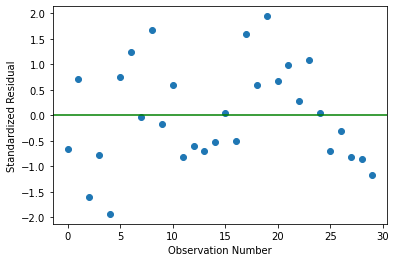

In [598]:
plt.plot(model3.resid_pearson,'o');plt.axhline(y=0,color='green');plt.xlabel("Observation Number");plt.ylabel("Standardized Residual")

In [599]:
# Predicted vs actual values

Text(0, 0.5, 'Actual')

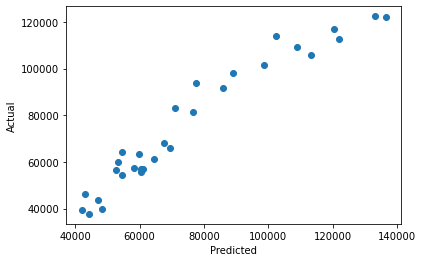

In [600]:
plt.scatter(x=pred3,y=dataset.Salary);plt.xlabel("Predicted");plt.ylabel("Actual")

Text(0, 0.5, 'Actual')

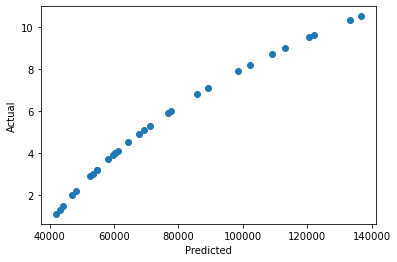

In [601]:
plt.scatter(x=pred3,y=dataset.YearsExperience);plt.xlabel("Predicted");plt.ylabel("Actual")

In [602]:
# Quadratic model

In [603]:
dataset["YearsExperience_Sq"] = dataset.YearsExperience*dataset.YearsExperience
dataset["YearsExperience_Sq"]

0       1.21
1       1.69
2       2.25
3       4.00
4       4.84
5       8.41
6       9.00
7      10.24
8      10.24
9      13.69
10     15.21
11     16.00
12     16.00
13     16.81
14     20.25
15     24.01
16     26.01
17     28.09
18     34.81
19     36.00
20     46.24
21     50.41
22     62.41
23     67.24
24     75.69
25     81.00
26     90.25
27     92.16
28    106.09
29    110.25
Name: YearsExperience_Sq, dtype: float64

In [604]:
model_quad = smf.ols("Salary~YearsExperience+YearsExperience_Sq",data=dataset).fit()
model_quad 

In [605]:
model_quad.params

Intercept             26214.932677
YearsExperience        9259.283888
YearsExperience_Sq       16.392566
dtype: float64

In [606]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     300.3
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           3.59e-19
Time:                        09:52:48   Log-Likelihood:                -301.43
No. Observations:                  30   AIC:                             608.9
Df Residuals:                      27   BIC:                             613.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.621e+04   4554.674      5.756      0.000    1.69e+04    3.56e+04
YearsExperience     9259.2839   1811.007      5.113      0.000    5543.405     1.3e+04
YearsExperience_Sq    16.3926    152.121      0.108      0.915    -295.734     328.520
==============================================================================
Omnibus:                        2.181   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.627
Skew:                           0.384   Prob(JB):                        0.443
Kurtosis:                       2.156   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [607]:
model_quad.conf_int(0.05)

,0,1
Intercept,16869.512653,35560.352701
YearsExperience,5543.405004,12975.162772
YearsExperience_Sq,-295.734369,328.519502


NameError: name 'pre_quad' is not defined

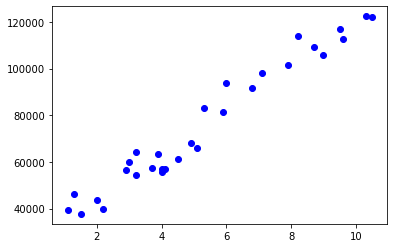

In [608]:
plt.scatter(dataset.YearsExperience,dataset.Salary,c="b");plt.plot(dataset.YearsExperience,pre_quad,"r")

(array([6., 3., 3., 3., 6., 2., 1., 2., 2., 2.]),
 array([-1.33, -1.  , -0.67, -0.34, -0.01,  0.32,  0.65,  0.98,  1.31,
         1.64,  1.96]),
 <BarContainer object of 10 artists>)

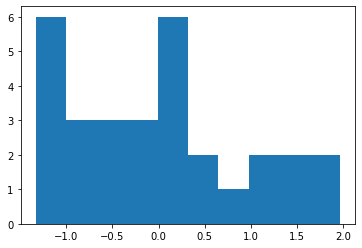

In [609]:
plt.hist(model_quad.resid_pearson) 

In [610]:
#### Implementing the Linear Regression model from sklearn library

In [611]:
from sklearn.linear_model import LinearRegression
import numpy as np

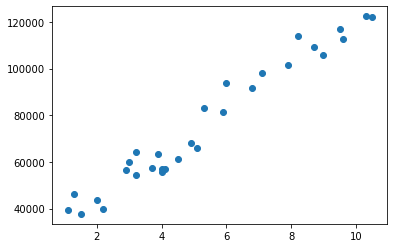

In [612]:
plt.scatter(dataset.YearsExperience,dataset.Salary)

In [613]:
model1 = LinearRegression()

In [614]:
model1.fit(dataset.YearsExperience.values.reshape(-1,1),dataset.Salary)

LinearRegression()

In [615]:
pred1 = model1.predict(dataset.YearsExperience.values.reshape(-1,1))
pred1

array([ 36187.16,  38077.15,  39967.14,  44692.12,  46582.12,  53197.09,
        54142.09,  56032.08,  56032.08,  60757.06,  62647.05,  63592.05,
        63592.05,  64537.05,  68317.03,  72097.02,  73987.01,  75877.  ,
        81546.98,  82491.97,  90051.94,  92886.93, 100446.9 , 103281.89,
       108006.87, 110841.86, 115566.84, 116511.84, 123126.81, 125016.8 ])

In [616]:
# Adjusted R-Squared value

In [617]:
model1.score(dataset.YearsExperience.values.reshape(-1,1),dataset.Salary)# 0.6700

0.9569566641435086

In [618]:
rmse1 = np.sqrt(np.mean((pred1-dataset.Salary)**2)) # 32.760
rmse1

5592.043608760662

In [619]:
model1.coef_

array([9449.96])

In [620]:
model1.intercept_

25792.20019866871

In [621]:
#### Residuals Vs Fitted values

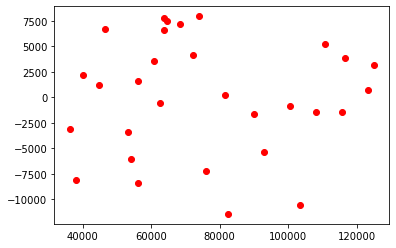

In [622]:
plt.scatter(pred1,(pred1-dataset.Salary),c="r")

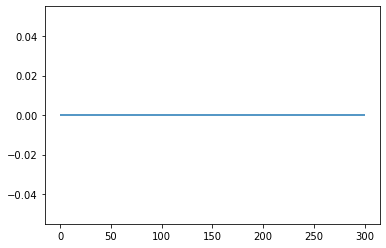

In [623]:
plt.hlines(y=0,xmin=0,xmax=300)

In [624]:
# checking normal distribution for residual

(array([2., 2., 2., 1., 2., 6., 3., 4., 2., 6.]),
 array([-11448.03,  -9507.42,  -7566.82,  -5626.22,  -3685.61,  -1745.01,
           195.59,   2136.2 ,   4076.8 ,   6017.4 ,   7958.01]),
 <BarContainer object of 10 artists>)

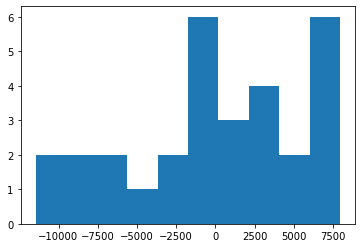

In [625]:
plt.hist(pred1-dataset.Salary)

In [626]:
### Fitting Quadratic Regression 

In [627]:
dataset["YearsExperience_sqrd"] = dataset.YearsExperience*dataset.YearsExperience
dataset["YearsExperience_sqrd"] 

0       1.21
1       1.69
2       2.25
3       4.00
4       4.84
5       8.41
6       9.00
7      10.24
8      10.24
9      13.69
10     15.21
11     16.00
12     16.00
13     16.81
14     20.25
15     24.01
16     26.01
17     28.09
18     34.81
19     36.00
20     46.24
21     50.41
22     62.41
23     67.24
24     75.69
25     81.00
26     90.25
27     92.16
28    106.09
29    110.25
Name: YearsExperience_sqrd, dtype: float64

In [628]:
model2 = LinearRegression()

In [629]:
model2.fit(X = dataset.iloc[:,[0,2]],y=dataset.Salary)

LinearRegression()

In [630]:
pred2 = model2.predict(dataset.iloc[:,[0,2]])
pred2

array([ 36419.98,  38279.71,  40140.74,  44799.07,  46664.7 ,  53204.72,
        54140.32,  56012.5 ,  56012.5 ,  60698.7 ,  62575.47,  63514.35,
        63514.35,  64453.56,  68213.66,  71979.01,  73863.65,  75749.6 ,
        81415.33,  82360.77,  89936.06,  92782.2 , 100386.34, 103243.3 ,
       108011.46, 110876.29, 115657.56, 116614.8 , 123324.64, 125244.69])

In [631]:
# Adjusted R-Squared value

In [632]:
model2.score(dataset.iloc[:,[0,2]],dataset.Salary)# 0.67791

0.956975168321065

In [633]:
rmse2 = np.sqrt(np.mean((pred2-dataset.Salary)**2)) # 32.366
rmse2

5590.841479683287

In [634]:
model2.coef_

array([9259.28,   16.39])

In [635]:
model2.intercept_

26214.932677059587

In [636]:
#### Residuals Vs Fitted values

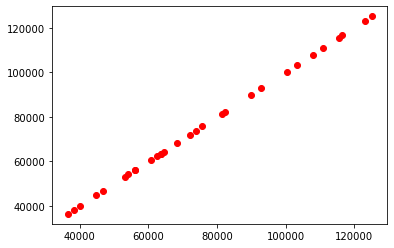

In [637]:
plt.scatter(pred2,(pred2-dataset.YearsExperience),c="r")

In [638]:
# Checking normal distribution

(array([4., 3., 4., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 36418.88,  45300.41,  54181.94,  63063.47,  71945.01,  80826.54,
         89708.07,  98589.6 , 107471.13, 116352.66, 125234.19]),
 <BarContainer object of 10 artists>)

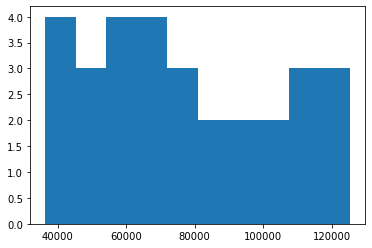

In [639]:
plt.hist(pred2-dataset.YearsExperience)

In [640]:
import pylab
import scipy.stats as st

((array([-2.  , -1.59, -1.35, -1.17, -1.02, -0.89, -0.77, -0.67, -0.57,
         -0.47, -0.38, -0.29, -0.21, -0.12, -0.04,  0.04,  0.12,  0.21,
          0.29,  0.38,  0.47,  0.57,  0.67,  0.77,  0.89,  1.02,  1.17,
          1.35,  1.59,  2.  ]),
  array([ 36418.88,  38278.41,  40139.24,  44797.07,  46662.5 ,  53201.82,
          54137.32,  56009.3 ,  56009.3 ,  60695.  ,  62571.57,  63510.35,
          63510.35,  64449.46,  68209.16,  71974.11,  73858.55,  75744.3 ,
          81409.43,  82354.77,  89929.26,  92775.1 , 100378.44, 103235.1 ,
         108002.76, 110867.29, 115648.06, 116605.2 , 123314.34, 125234.19])),
 (27259.212745934678, 75997.68666666668, 0.9781142406747799))

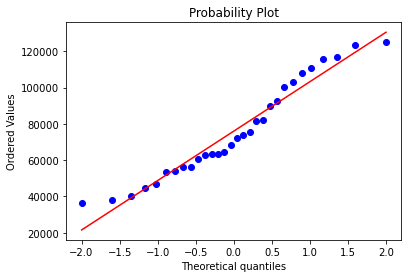

In [641]:
st.probplot(pred2-dataset.YearsExperience,dist="norm",plot=pylab)

In [642]:
# Let us prepare a model by applying transformation on dependent variable

In [643]:
dataset["Salary_sqrt"] = np.sqrt(dataset.Salary)
dataset["Salary_sqrt"]

0     198.350700
1     214.953483
2     194.244691
3     208.626460
4     199.727314
5     237.995798
6     245.254969
7     233.334524
8     253.860198
9     239.142217
10    251.431899
11    236.207536
12    238.656657
13    238.916303
14    247.206392
15    260.649190
16    256.961087
17    288.249892
18    285.242003
19    306.496330
20    302.882816
21    313.485247
22    318.279751
23    337.360341
24    330.803567
25    324.933839
26    342.007310
27    335.611382
28    349.844251
29    349.101704
Name: Salary_sqrt, dtype: float64

In [644]:
model3 = LinearRegression()

In [645]:
model3.fit(X= dataset.iloc[:,[0,1]],y=dataset.Salary_sqrt)

LinearRegression()

In [646]:
# Adjusted R-Squared value

In [647]:
model3.score(dataset.iloc[:,[0,2]],dataset.Salary_sqrt)# 0.74051

-8.317029603996575

In [648]:
rmse3 = np.sqrt(np.mean(((pred3)**2-dataset.Salary)**2)) # 32.0507
rmse3

8161504480.023723

In [649]:
model3.coef_

array([-0.41,  0.  ])

In [650]:
model3.intercept_

133.01467401503106

In [651]:
#### Residuals Vs Fitted values

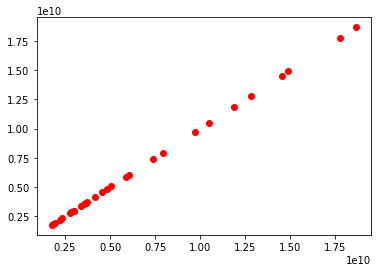

In [652]:
plt.scatter((pred3)**2,((pred3)**2-dataset.Salary),c="r")

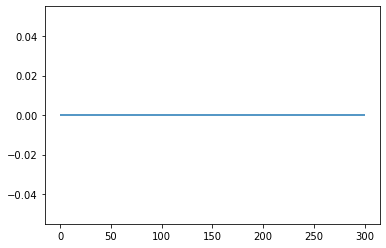

In [653]:
plt.hlines(y=0,xmin=0,xmax=300)  

In [654]:
# checking normal distribution for residuals 

(array([10.,  8.,  2.,  2.,  1.,  2.,  1.,  2.,  0.,  2.]),
 array([1.76e+09, 3.45e+09, 5.14e+09, 6.83e+09, 8.52e+09, 1.02e+10,
        1.19e+10, 1.36e+10, 1.53e+10, 1.70e+10, 1.87e+10]),
 <BarContainer object of 10 artists>)

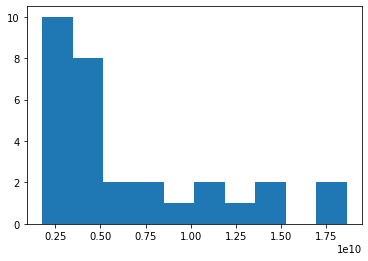

In [655]:
plt.hist((pred3)**2-dataset.Salary)

((array([-2.  , -1.59, -1.35, -1.17, -1.02, -0.89, -0.77, -0.67, -0.57,
         -0.47, -0.38, -0.29, -0.21, -0.12, -0.04,  0.04,  0.12,  0.21,
          0.29,  0.38,  0.47,  0.57,  0.67,  0.77,  0.89,  1.02,  1.17,
          1.35,  1.59,  2.  ]),
  array([1.76e+09, 1.85e+09, 1.95e+09, 2.21e+09, 2.32e+09, 2.77e+09,
         2.84e+09, 2.99e+09, 2.99e+09, 3.39e+09, 3.56e+09, 3.65e+09,
         3.65e+09, 3.74e+09, 4.14e+09, 4.58e+09, 4.81e+09, 5.06e+09,
         5.88e+09, 6.03e+09, 7.37e+09, 7.95e+09, 9.72e+09, 1.05e+10,
         1.19e+10, 1.28e+10, 1.45e+10, 1.49e+10, 1.77e+10, 1.87e+10])),
 (4722063528.246421, 6538887995.849121, 0.9146557225870976))

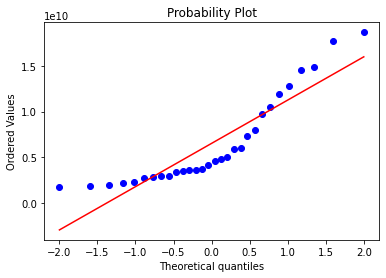

In [656]:
st.probplot((pred3)**2-dataset.Salary,dist="norm",plot=pylab)

In [657]:
# Let us prepare a model by applying transformation on dependent variable without transformation on input variables 


In [658]:
model4 = LinearRegression()

In [659]:
model4.fit(X = dataset.YearsExperience.values.reshape(-1,1),y=dataset.Salary_sqrt)

LinearRegression()

In [660]:
pred4 = model4.predict( dataset.YearsExperience.values.reshape(-1,1))
pred4

array([199.46, 202.87, 206.29, 214.81, 218.22, 230.16, 231.87, 235.28,
       235.28, 243.81, 247.22, 248.93, 248.93, 250.63, 257.45, 264.28,
       267.69, 271.1 , 281.33, 283.04, 296.68, 301.8 , 315.45, 320.56,
       329.09, 334.21, 342.74, 344.44, 356.38, 359.79])

In [661]:
# Adjusted R-Squared value

In [662]:
model4.score(dataset.YearsExperience.values.reshape(-1,1),dataset.Salary_sqrt)# 0.7096

0.949835353386529

In [663]:
rmse4 = np.sqrt(np.mean(((pred4)**2-dataset.YearsExperience)**2)) # 34.165
rmse4

80444.62166364978

In [664]:
model4.coef_

array([17.06])

In [665]:
model4.intercept_

180.70022140543102

In [666]:
#### Residuals Vs Fitted values

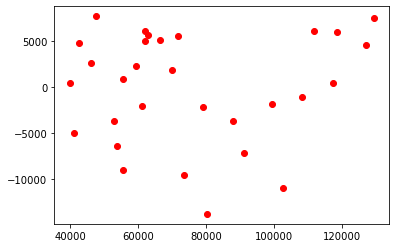

In [667]:
plt.scatter((pred4)**2,((pred4)**2-dataset.Salary),c="r")

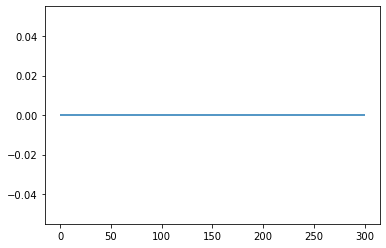

In [668]:
plt.hlines(y=0,xmin=0,xmax=300)

((array([-2.  , -1.59, -1.35, -1.17, -1.02, -0.89, -0.77, -0.67, -0.57,
         -0.47, -0.38, -0.29, -0.21, -0.12, -0.04,  0.04,  0.12,  0.21,
          0.29,  0.38,  0.47,  0.57,  0.67,  0.77,  0.89,  1.02,  1.17,
          1.35,  1.59,  2.  ]),
  array([-13828.69, -11050.86,  -9592.88,  -9087.79,  -7188.79,  -6386.39,
          -5047.26,  -3716.22,  -3666.46,  -2214.32,  -2099.93,  -1795.3 ,
          -1129.42,    442.25,    499.84,    912.21,   1904.45,   2254.02,
           2619.75,   4617.49,   4822.51,   5007.33,   5171.88,   5628.15,
           5735.4 ,   6005.93,   6113.66,   6170.33,   7579.58,   7730.97])),
 (6077.894791154169, -119.61845560328295, 0.9704599722870153))

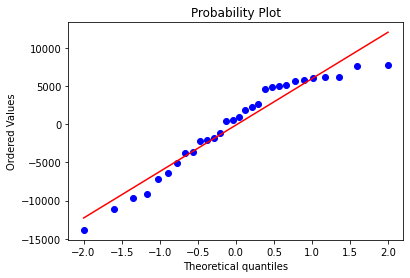

In [669]:
st.probplot((pred4)**2-dataset.Salary,dist="norm",plot=pylab)

In [670]:
# Checking normal distribution for residuals 

(array([1., 2., 1., 2., 3., 4., 3., 3., 4., 7.]),
 array([-13828.69, -11672.72,  -9516.76,  -7360.79,  -5204.83,  -3048.86,
          -892.89,   1263.07,   3419.04,   5575.01,   7730.97]),
 <BarContainer object of 10 artists>)

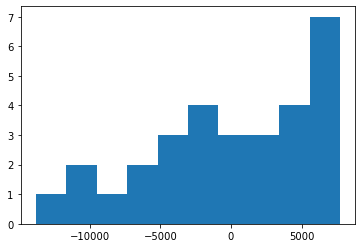

In [671]:
plt.hist((pred4)**2-dataset.Salary)

In [672]:
#MODEL TESTING

In [673]:
# Finding Coefficient parameters
model.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [674]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           1.14e-20
Time:                        09:53:57   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [675]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept    -7.281283
 Salary       24.950094
 dtype: float64,
 Intercept    6.300123e-08
 Salary       1.143068e-20
 dtype: float64)

In [676]:
#MODEL PREDICTION

In [677]:
# MANUAL PREDICTION FOR 3 YEARS EXPERIENCE
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [678]:
# AUTOMATIC PREDICTION FOR SAY 3 & 5 YEARS EXPERIENCE
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [679]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred


,YearsExperience
0,3
1,5
